## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
num_mice=mouse_study["Mouse ID"].nunique()
total_mice=pd.DataFrame({"Total Mice":[num_mice]})
total_mice.head()

,Total Mice
0,249


In [7]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
dupe_mice=mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep=False)]


In [8]:
# Optional: Display all the data for the duplicate mouse ID. 
dupe_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
for mouse in dupe_mice['Mouse ID']:
    clean_mouse_study = mouse_study [mouse_study['Mouse ID'] != mouse]
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean=clean_mouse_study["Mouse ID"].nunique()
total_mice_clean=pd.DataFrame({"Total Mice":[num_mice_clean]})
total_mice_clean.head()

,Total Mice
0,248


## Summary Statistics

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
study_summary_df=pd.DataFrame()    
drug_group=clean_mouse_study.groupby("Drug Regimen")    
study_summary_df["Tumor Vol. Mean (mm3)"]=drug_group["Tumor Volume (mm3)"].mean()
study_summary_df["Tumor Vol. Median (mm3)"]=drug_group["Tumor Volume (mm3)"].median()
study_summary_df["Tumor Vol. Variance"]=drug_group["Tumor Volume (mm3)"].var()
study_summary_df["Tumor Vol. Std. Deviation"]=drug_group["Tumor Volume (mm3)"].std()
study_summary_df["Tumor Vol. SEM"]=drug_group["Tumor Volume (mm3)"].sem()
study_summary_df


,Tumor Vol. Mean (mm3),Tumor Vol. Median (mm3),Tumor Vol. Variance,Tumor Vol. Std. Deviation,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean' , 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

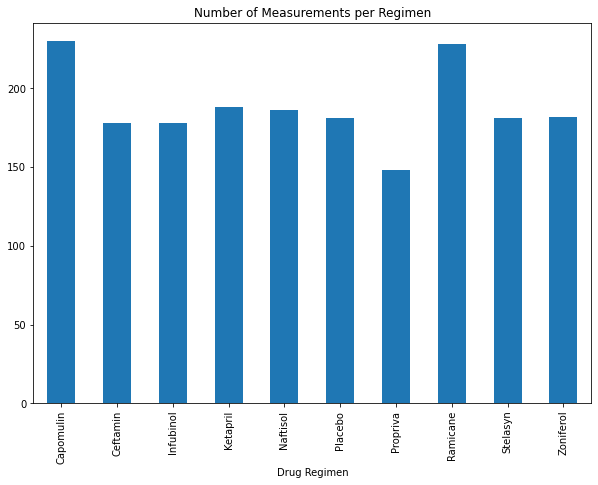

In [99]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_and_time = clean_mouse_study.groupby('Drug Regimen').agg({'Timepoint': 'count'})
drug_and_time.plot(kind="bar", legend=False, title="Number of Measurements per Regimen", figsize=(10,7))


(-0.5, 9.5)

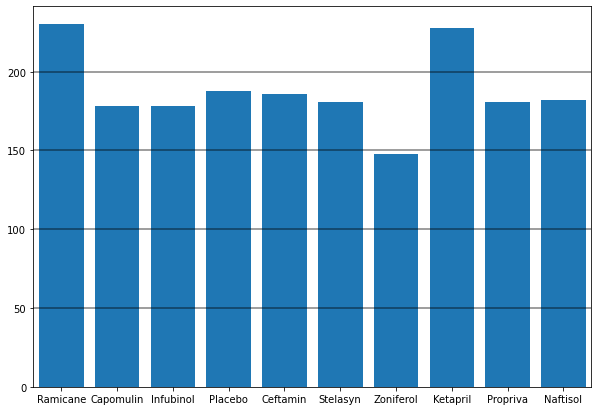

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=np.arange(len(study_summary_df))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(10,7))
plt.bar(x_axis, drug_group["Drug Regimen"].count() )
plt.xticks(tick_locations, clean_mouse_study["Drug Regimen"].unique())
plt.hlines(50, -.5, 11, alpha=0.5)
plt.hlines(100, -.5, 11, alpha=0.5)
plt.hlines(150, -.5, 11, alpha=0.5)
plt.hlines(200, -.5, 11, alpha=0.5)
plt.xlim(-.5,9.5)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002E4651EF070>],
      dtype=object)

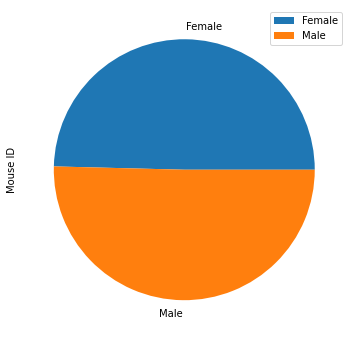

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
m_v_f = clean_mouse_study.groupby('Sex').agg({'Mouse ID': 'nunique'})
m_v_f.plot(kind="pie", subplots=True, figsize=(6,6))

([<matplotlib.patches.Wedge at 0x2e46535c1c0>,
 [Text(-1.0999117423341975, 0.013934097579311333, 'Female'),
  Text(1.0999117423341975, -0.013934097579311466, 'Male')],
 [Text(-0.5999518594550168, 0.0076004168614425445, '49.6%'),
  Text(0.5999518594550168, -0.007600416861442617, '50.4%')])

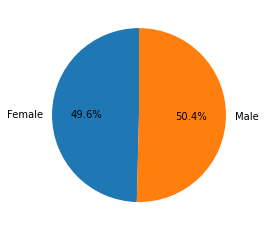

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels='Female', 'Male'
sizes=m_v_f["Mouse ID"]
plt.pie(sizes, labels=labels,autopct="%1.1f%%", startangle=90)


## Quartiles, Outliers and Boxplots

In [186]:
###clean_mouse_study
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
end_times=clean_mouse_study.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])
#This method of getting the last timepoint makes merging unnecessary, fount on Stack Overflow, user:Rani
#https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [205]:
# Put treatments into a list for a for loop (and later for plot labels)
drug_list="Capomulin", "Ramicane", "Infubinol", "Ceftamin"
four_drugs=end_times[end_times["Drug Regimen"].isin(drug_list)]
# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_data=four_drugs["Tumor Volume (mm3)"]
tumor_data    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for label, row in df.iterrows():
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
quartiles = four_drugs['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = four_drugs.loc[(four_drugs['Tumor Volume (mm3)'] < lower_bound) 
                                | (four_drugs['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


{'whiskers': [<matplotlib.lines.Line2D at 0x2e46577fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x2e46578b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e46577faf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e46578bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e46578bf10>],
 'means': []}

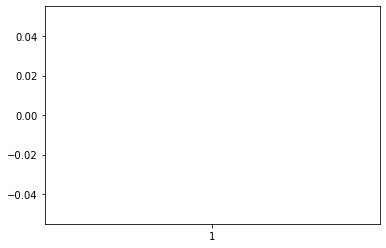

In [204]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_data)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig, ax = plt.subplots()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
